In [175]:
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import display, clear_output
import time

import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [176]:
np.random.seed(333)

In [177]:
random_1=np.random.randn(2,100)

In [178]:
random_1.shape

(2, 100)

In [179]:
random_2 = np.random.randn(2,100) + 2

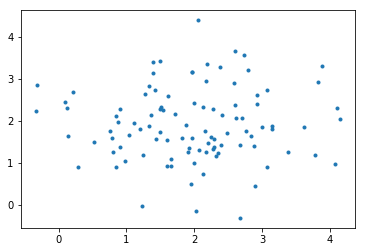

In [180]:
pl.plot(random_2[0], random_2[1],'.')

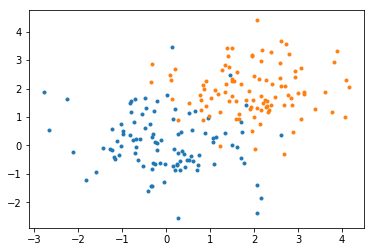

In [181]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')

In [182]:
clusters=2

In [183]:
random_stack = np.hstack([random_1, random_2])

In [184]:
min(random_stack[0]), max(random_stack[0])

centers = np.array([[0.,-1.], [0,-2]]) 
#np.array((np.random.rand(4)   * (max(random_stack[0]) - min(random_stack[0]))) + min(random_stack[0])).reshape(2,2)

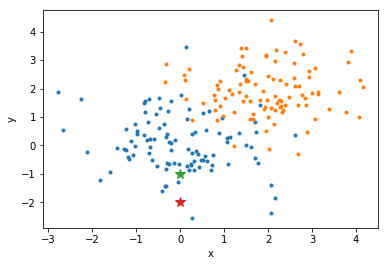

In [185]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [186]:
def distmetric(x, y, center):
    distmetric = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [187]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [188]:
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


In [189]:
newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                 np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
centers, newc

(array([[ 0., -1.],
        [ 0., -2.]]), array([[ 0.96972306,  1.06522176],
        [ 1.02400655, -2.10176012]]))

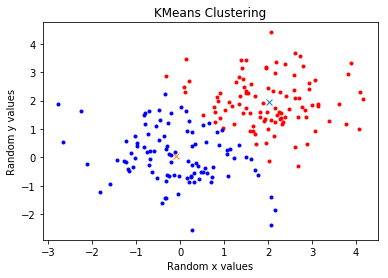

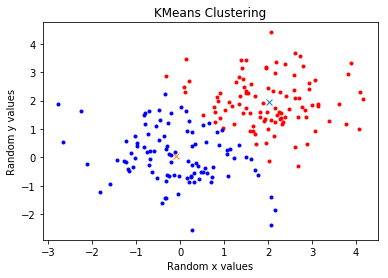

In [190]:
iterat = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
             np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:,~cl2]])[0],
              np.hstack([random_1[:, ~cl1], random_2[:,~cl2]])[1],'b.')
l3, = ax.plot(centers[0,0], centers[0,1],'*')
l4, = ax.plot(centers[1,0], centers[1,1],'*')

display(fig)

while (not (centers == newc).all()) or iterat > 10:
    print(iterat)
    
    #set new centers as old centers 
    centers = newc
    
    iterat += 1
    pl.cla()
    
    l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
                np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
    l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0],
                np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')
    l3, = ax.plot(centers[0,0], centers[0,1], 'x')
    l4, = ax.plot(centers[1,0], centers[1,1], 'x')
    plt.title("KMeans Clustering")
    plt.xlabel("Random x values")
    plt.ylabel("Random y values")
    #clear_output(wait=True)
    display(fig)
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    
    print(centers, newc)
    
    #define new center
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    
    #animation
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
plt.show()

#newc[0]
    

Figure 1. KMeans Clustering Animation